# Source

https://brilliant.org/wiki/taylor-series-approximation/ 

https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

http://firsttimeprogrammer.blogspot.com/2015/03/taylor-series-with-python-and-sympy.html

## Define functions and import libraries

In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Define the variable and the function to approximate
x = sy.Symbol('x')
f = x**0.321

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)
    
#Numerical differentiation
def NumDiff(function, i):
    h=10**(-2)
    if i == 0:
        return function
    else:
        return NumDiff(((function.subs(x,x+h)-function.subs(x,x-h))/(2*h)), i-1)
    
    
# Taylor approximation at x0 of the function 'function'
def taylorNum(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (NumDiff(function, i).subs(x, x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p

## Plot results of the exact function and approximations

Taylor expansion at n=1 0.321006099519941*x + 0.678993900480059
Taylor expansion at n=2 0.321006099519941*x - 0.108995843560024*(x - 1)**2 + 0.678993900480059
Taylor expansion at n=5 0.321006099519941*x + 0.03012375831604*(x - 1)**5 - 0.0408964538946748*(x - 1)**4 + 0.0610222679000193*(x - 1)**3 - 0.108995843560024*(x - 1)**2 + 0.678993900480059
Taylor expansion at n=20 0.321006099519941*x - 489142.7396926*(x - 1)**20 + 14557.8196337083*(x - 1)**19 - 5827.18551398508*(x - 1)**18 - 1012.93422744309*(x - 1)**17 - 134.530327082285*(x - 1)**16 - 6.72651635411424*(x - 1)**15 - 12.6122181639642*(x - 1)**14 + 0.105076158409492*(x - 1)**12 + 0.0303735770402437*(x - 1)**11 - 0.0129805996472663*(x - 1)**10 + 0.0137566137566138*(x - 1)**9 - 0.016015625*(x - 1)**8 + 0.0191313244047619*(x - 1)**7 - 0.0235286288791233*(x - 1)**6 + 0.03012375831604*(x - 1)**5 - 0.0408964538946748*(x - 1)**4 + 0.0610222679000193*(x - 1)**3 - 0.108995843560024*(x - 1)**2 + 0.678993900480059


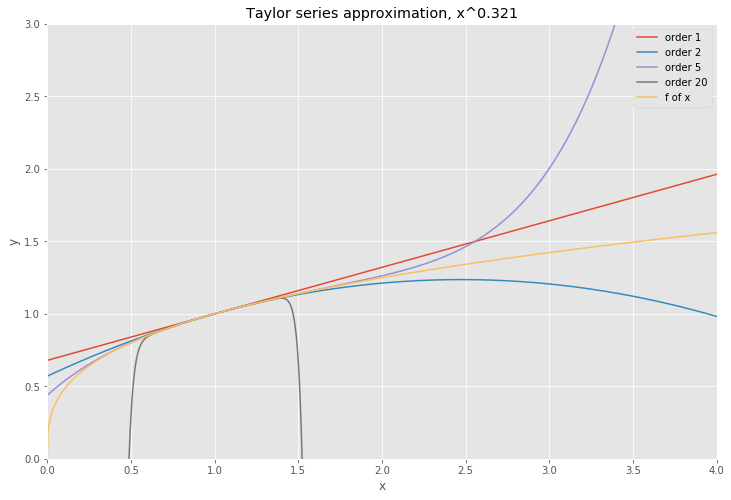

In [3]:
def plot():
    x_lims = [0,4]
    x1 = np.linspace(0,4,800)
    y1 = []
    # Approximate
    for j in [1,2,5,20]:
        func = taylorNum(f,1,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    # Plot the function to approximate
    plt.plot(x1,x1**0.321,label='f of x')
    plt.xlim(x_lims)
    plt.ylim([0,3])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation, x^0.321')
    plt.rcParams["figure.figsize"] = (12,8)
    plt.show()

plot()

## Plot error function

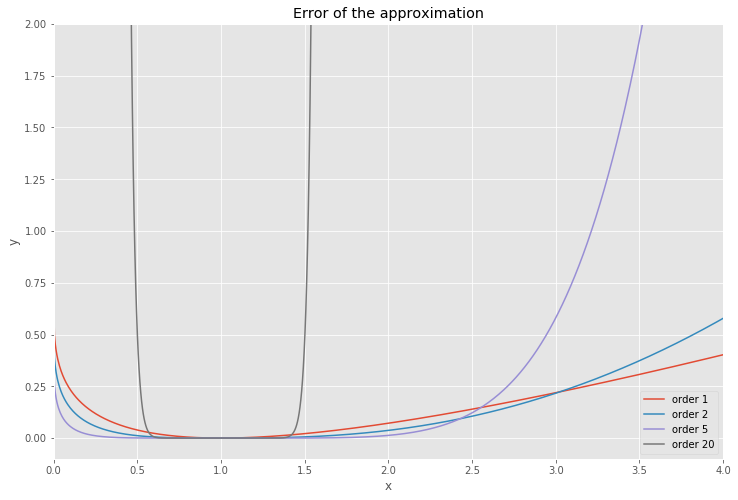

In [4]:
#Plot error function
def plotError():
    x_lims = [0,4]
    x1 = np.linspace(0,4,800)
    y1 = []
    # Approximate
    for j in [1,2,5,20]:
        func = taylorNum(f,1,j)
        for k in x1:
            y1.append(abs(func.subs(x,k)-k**0.321))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    # Plot the function to approximate (sine, in this case)
    plt.xlim(x_lims)
    plt.ylim([-0.1,2])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Error of the approximation')
    #plt.figure(figsize=(10,10))
    plt.rcParams["figure.figsize"] = (12,6)
    plt.show()

plotError()